In [1]:
from tempForecast.components.data_transformation import WeatherDatabase
from tempForecast.components.data_ingestion import weather_scraping

In [95]:
data = weather_scraping().load_data()
# on instancie la classe avec la base de donnée déjà chargé pour ne pas rescrapé tout
# si on met last_df en argument cela va scrapper seulement depuis la dernière date du df donc enlever pour éviter une interpolation
data_ingestion = weather_scraping(last_df=data)
# scraping 
data = data_ingestion.web_scraping()
# il faut ajouter cette base à la db
data_ingestion.load_data(df=data)
data = WeatherDatabase().load_data_and_transform()

2023-11-25 17:34:00.891311
https://www.infoclimat.fr/observations-meteo/archives/25/novembre/2023/paris-5eme-tour-zamansky-jussieu/000BV.html?dixminutes


c:\users\zbook create g7\desktop\temperature forecasting\src\tempForecast\components\data_ingestion.py:65: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  date_text = BeautifulSoup(


2023-11-24 17:34:00.891311
https://www.infoclimat.fr/observations-meteo/archives/24/novembre/2023/paris-5eme-tour-zamansky-jussieu/000BV.html?dixminutes


c:\users\zbook create g7\desktop\temperature forecasting\src\tempForecast\components\data_ingestion.py:65: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  date_text = BeautifulSoup(


2023-11-23 17:34:00.891311
https://www.infoclimat.fr/observations-meteo/archives/23/novembre/2023/paris-5eme-tour-zamansky-jussieu/000BV.html?dixminutes


c:\users\zbook create g7\desktop\temperature forecasting\src\tempForecast\components\data_ingestion.py:65: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  date_text = BeautifulSoup(


2023-11-22 17:34:00.891311
https://www.infoclimat.fr/observations-meteo/archives/22/novembre/2023/paris-5eme-tour-zamansky-jussieu/000BV.html?dixminutes


c:\users\zbook create g7\desktop\temperature forecasting\src\tempForecast\components\data_ingestion.py:65: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  date_text = BeautifulSoup(


2023-11-21 17:34:00.891311
https://www.infoclimat.fr/observations-meteo/archives/21/novembre/2023/paris-5eme-tour-zamansky-jussieu/000BV.html?dixminutes


c:\users\zbook create g7\desktop\temperature forecasting\src\tempForecast\components\data_ingestion.py:65: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  date_text = BeautifulSoup(


2023-11-20 17:34:00.891311
https://www.infoclimat.fr/observations-meteo/archives/20/novembre/2023/paris-5eme-tour-zamansky-jussieu/000BV.html?dixminutes


c:\users\zbook create g7\desktop\temperature forecasting\src\tempForecast\components\data_ingestion.py:65: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  date_text = BeautifulSoup(


Error inserting into database: Error binding parameter 1 - probably unsupported type.
Error inserting into database: Error binding parameter 1 - probably unsupported type.
Error inserting into database: Error binding parameter 1 - probably unsupported type.
Error inserting into database: Error binding parameter 1 - probably unsupported type.
Error inserting into database: Error binding parameter 1 - probably unsupported type.
Error inserting into database: Error binding parameter 1 - probably unsupported type.
Error inserting into database: Error binding parameter 1 - probably unsupported type.
Error inserting into database: Error binding parameter 1 - probably unsupported type.
Error inserting into database: Error binding parameter 1 - probably unsupported type.
Error inserting into database: Error binding parameter 1 - probably unsupported type.
Error inserting into database: Error binding parameter 1 - probably unsupported type.


In [96]:
data.isna().sum()

id                       0
datetime                 0
température              6
vent                    27
rafales              15744
vent_direction       15744
humidite                 6
pt_de_rosee              6
pression                 0
bio_meteo            30607
radiation_solaire    53163
dtype: int64

In [97]:
data["unique_id"] = "temp"
data.rename(columns={"température":"y"}, inplace=True)
data.rename(columns={"datetime":"ds"}, inplace=True)

In [98]:
data['y'].fillna(method='bfill', inplace=True)
data['vent'].fillna(method='bfill', inplace=True)
data['rafales'].fillna(0, inplace=True)
data['vent_direction'].fillna(0, inplace=True)
data['pt_de_rosee'].fillna(0, inplace=True)
data['humidite'].fillna(0, inplace=True)


C:\Users\Zbook Create G7\AppData\Local\Temp\ipykernel_54208\24444047.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['y'].fillna(method='bfill', inplace=True)
C:\Users\Zbook Create G7\AppData\Local\Temp\ipykernel_54208\24444047.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['vent'].fillna(method='bfill', inplace=True)


In [99]:
data.drop(columns=['bio_meteo','radiation_solaire'], inplace=True)

In [100]:
import lightgbm as lgb

from mlforecast import MLForecast
from sklearn.linear_model import LinearRegression

In [102]:
data.vent_direction = data.vent_direction.astype(float)

In [180]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


Text(0.5, 0, 'Lag')

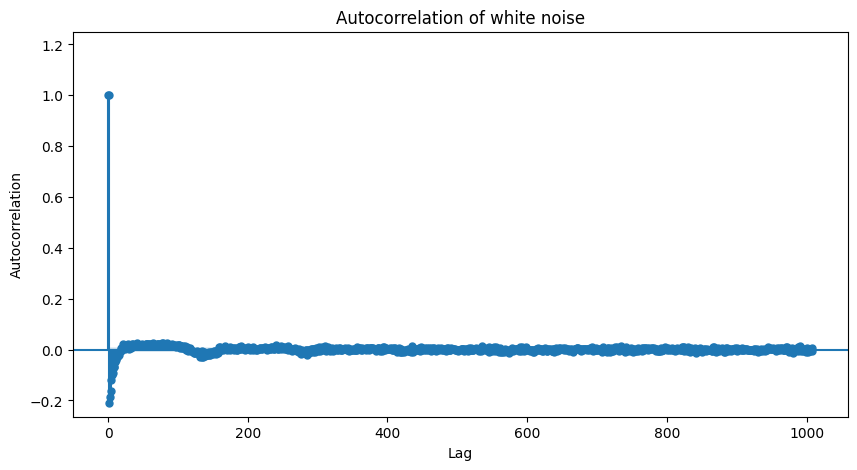

In [183]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_pacf(
    x=data["y"],
    lags=144*7,
    ax=ax,
    alpha=0.05,
    auto_ylims=True, method="ywmle"
)
ax.set_title("Autocorrelation of white noise")
ax.set_ylabel("Autocorrelation")
ax.set_xlabel("Lag")

In [103]:
mlf = MLForecast(
    models = [LinearRegression(), lgb.LGBMRegressor()],
    lags=[1, 12],
    freq = '10T'
)
mlf.fit(data)
mlf.predict(12)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1448
[LightGBM] [Info] Number of data points in the train set: 60157, number of used features: 9
[LightGBM] [Info] Start training from score 13.407278


,unique_id,ds,LinearRegression,LGBMRegressor
0,temp,2023-11-25 18:40:00,5.154476,5.01859
1,temp,2023-11-25 18:50:00,5.110243,5.01859
2,temp,2023-11-25 19:00:00,5.079393,5.01859
3,temp,2023-11-25 19:10:00,5.055484,5.01859
4,temp,2023-11-25 19:20:00,5.044383,5.01859
5,temp,2023-11-25 19:30:00,5.033596,5.01859
6,temp,2023-11-25 19:40:00,5.029180,5.01859
7,temp,2023-11-25 19:50:00,5.030955,5.01859
8,temp,2023-11-25 20:00:00,5.038745,5.01859
9,temp,2023-11-25 20:10:00,5.046314,5.01859


In [104]:
from utilsforecast.plotting import plot_series

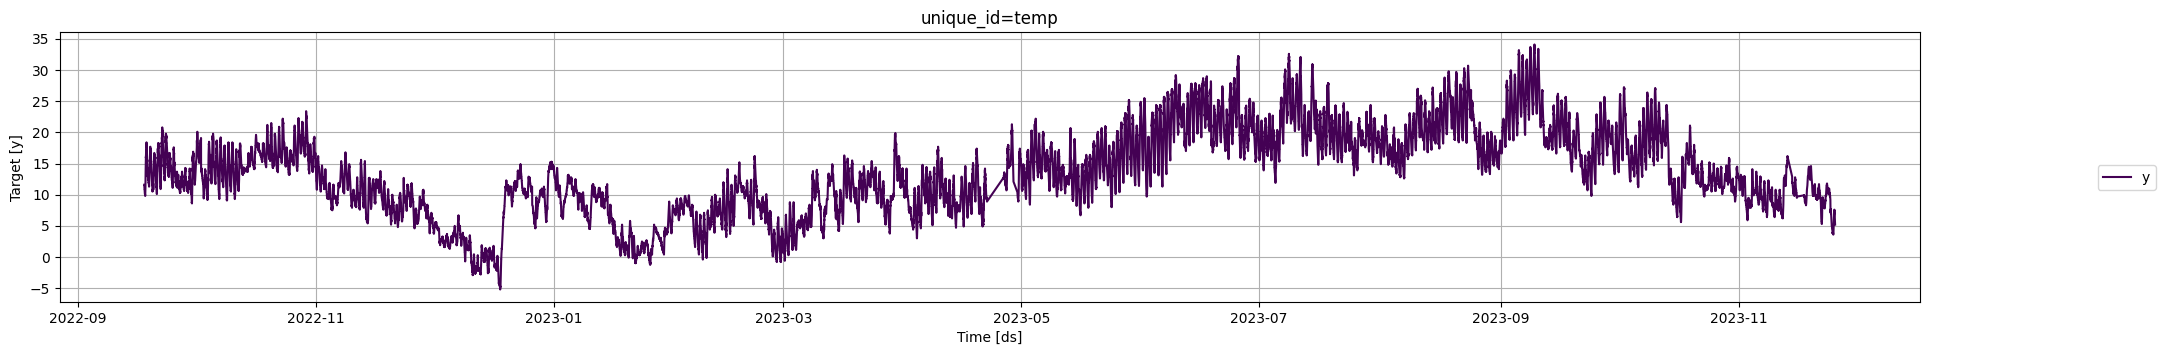

In [105]:
fig = plot_series(data)
fig

In [106]:
df = data.copy()

In [128]:
import pandas as pd

In [151]:
threshold_time = df['ds'].max() - pd.Timedelta(hours=168)

# Split the dataframe
df_train = df[df['ds'] <= threshold_time]
df_last_24_hours = df[df['ds'] > threshold_time]


In [184]:
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean
from mlforecast.utils import PredictionIntervals

In [188]:
mlf = MLForecast(
    models = [LinearRegression(), lgb.LGBMRegressor()],
    lags=[1,2,3,4,5,6],
    freq='10T',
    lag_transforms={  
        1: [expanding_mean],
        24: [(rolling_mean, 48)],
    },
    date_features=['month', 'hour', 'dayofweek', 'year', 'day', 'week', 'minute', 'quarter']
)

mlf.fit(df_train)
pred = mlf.predict(df_last_24_hours.shape[0])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2355
[LightGBM] [Info] Number of data points in the train set: 59267, number of used features: 20
[LightGBM] [Info] Start training from score 13.464307


c:\Users\Zbook Create G7\Desktop\temperature forecasting\venv\lib\site-packages\mlforecast\forecast.py:645: UserWarning: Please rerun the `fit` method passing a proper value to prediction intervals to compute them.
  warnings.warn(warn_msg, UserWarning)


In [192]:
pred

,unique_id,ds,LinearRegression,LGBMRegressor
0,temp,2023-11-18 18:40:00,12.816723,12.066154
1,temp,2023-11-18 18:50:00,12.823653,12.066154
2,temp,2023-11-18 19:00:00,12.824662,12.066154
3,temp,2023-11-18 19:10:00,12.819256,12.066154
4,temp,2023-11-18 19:20:00,12.812708,12.066154
...,...,...,...,...
826,temp,2023-11-24 12:20:00,12.078465,12.096411
827,temp,2023-11-24 12:30:00,12.076869,12.096411
828,temp,2023-11-24 12:40:00,12.075473,12.096411
829,temp,2023-11-24 12:50:00,12.074249,12.096411


In [167]:
df_last_24_hours.shape, pred.shape

((831, 10), (831, 4))

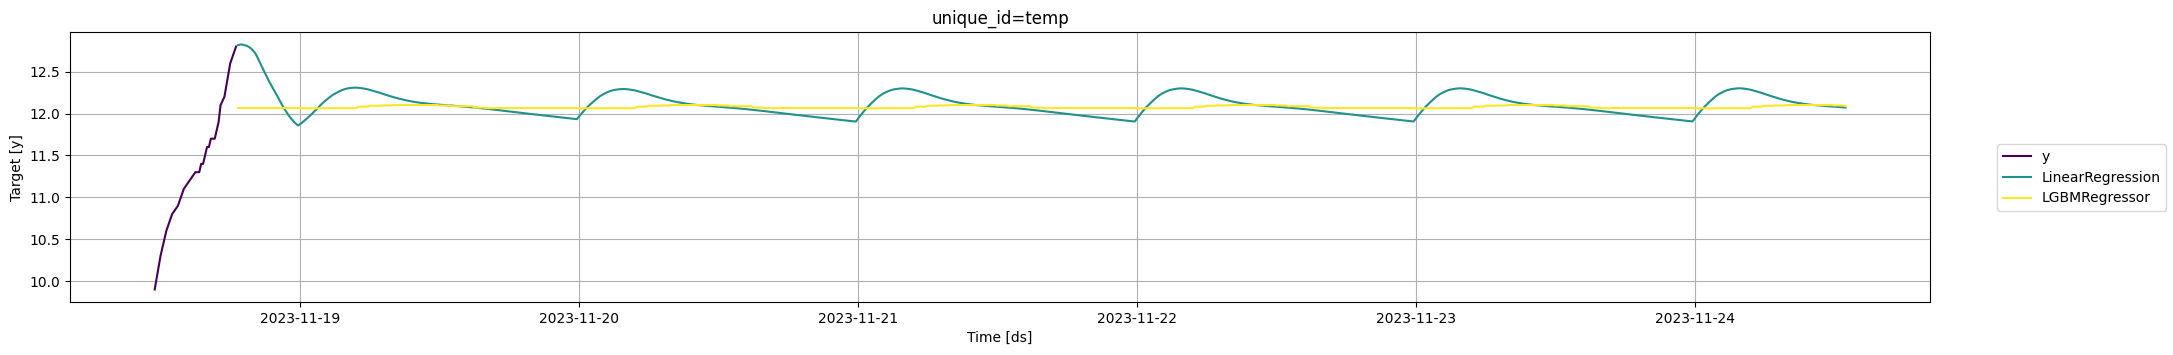

In [168]:
fig = plot_series(
    df_train,  
    pred, 
 
    models=['LinearRegression', 'LGBMRegressor'],
    plot_random=False, 
    max_insample_length=24
)
fig

In [169]:
pred.index = pred.ds

In [170]:
pred.drop(columns="ds", inplace=True)

In [171]:
import matplotlib.pyplot as plt

In [172]:
mask = df_last_24_hours.index.isin(pred.index)
mask_2 = pred.index.isin(df_last_24_hours.index)


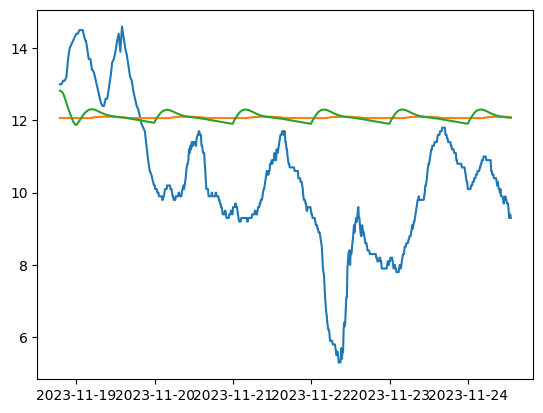

In [173]:
plt.plot(df_last_24_hours['y'][mask])
plt.plot(pred['LGBMRegressor'][mask_2])
plt.plot(pred['LinearRegression'][mask_2])


In [91]:
pred

,unique_id,LinearRegression,LGBMRegressor
ds,,,
2023-11-21 18:20:00,temp,10.646949,10.607
2023-11-21 18:30:00,temp,10.607504,10.607
2023-11-21 18:40:00,temp,10.569200,10.607
2023-11-21 18:50:00,temp,10.544077,10.607
2023-11-21 19:00:00,temp,10.525716,10.607
2023-11-21 19:10:00,temp,10.513922,10.607
2023-11-21 19:20:00,temp,10.502469,10.607
2023-11-21 19:30:00,temp,10.497384,10.607
2023-11-21 19:40:00,temp,10.492445,10.607
